# Exam Advanced Machine Learning


## Problem statement:
**Arnold Schwarzenegger** has a camera that points to the street. This camera is part of a surveillance system, and he has realized, that several times, a bird poses in front of the camera, and some regions are not visible.

He wants to be able to detect when this bird is in front of his camera, so as to kill it with his gun, after saying: "*hasta la vista baby*". He has contacted you in order you to build some "*Artificial Intelligence stuff*" to tell him when the bird is in the camera. Arnold tells you, that something happened to the hard drive that was storing the videos and that he only has images of the street in front of his house when he did not have any problem with the bird.

---

So, you have created a dataset from those old videos, extracting some frames from them, and storing them as images. You are sure that every image you selected are images of normal operation of the camera. and they look like this: 

![alt text](http://www.svcl.ucsd.edu/projects/anomaly/image/index/025c_74.jpg)

You also created a test environment, where you simulate the bird as a black box. You suppose that if you are able to detect the black box, you would be able to detect the bird. You decided to mix correct images and black boxed images in this test environment. 

---
Finally, in the final Validation step, you have actual images of a bird appearing in front of the camera; you will use these final images for the final part of this exam. 

---



## Part 0: UNZIP DATASET (only for COLAB)

Having the data uploaded to colab highly speeds up the training. please, upload the zip file provided, and unzip it. (it can take like 5 minutes, so go on with the exam, start to code) 


In [ ]:
!mkdir /content/data
!unzip /content/examDataset.zip -d /content/data

mkdir: cannot create directory ‘/content/data’: File exists
unzip:  cannot find or open /content/examDataset.zip, /content/examDataset.zip.zip or /content/examDataset.zip.ZIP.


## Part 1: Data Preprocessing (2pt)


---



You own a GPU from 2018, a GTX1060 6GB. It is still quite good for deep learning, but you realized that you should fix the **size of the images to be 128 x 128** for the fitting to be fast. **The images are black and white**, and you read somewere that the **class_mode** you need to use for this type of problem has to be **"input"** (class_mode='input'). AND do not shuffle the images! (shuffle=False) (1.5pt)

you also will want to have a validation dataset in order to know when to finish the trainning of the data. The Validation split will be -> **95% train, 5% validation** (0.5pt)



---





In [1]:
#imports
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [2]:
#preprocessing

it_train = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.05)
train = it_train.flow_from_directory('train', target_size=(128,128), batch_size=32, color_mode='grayscale', class_mode='input', shuffle=False, subset='training')
val = it_train.flow_from_directory('train', target_size=(128,128), batch_size=32, color_mode='grayscale', class_mode='input', shuffle=False, subset='validation')

it_test = ImageDataGenerator(rescale=1./255)
test = it_train.flow_from_directory('test', target_size=(128,128), batch_size=32,  color_mode='grayscale', class_mode='input', shuffle=False)

it_evaluation = ImageDataGenerator(rescale=1./255)
evaluation = it_train.flow_from_directory('finalEvaluation', target_size=(128,128), batch_size=32,  color_mode='grayscale', class_mode='input', shuffle=False)

Found 885 images belonging to 1 classes.
Found 46 images belonging to 1 classes.
Found 690 images belonging to 1 classes.
Found 50 images belonging to 1 classes.


Z:\Programacion\Anaconda\envs\deepl\lib\site-packages\keras_preprocessing\image\utils.py:173: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


##Part 2: Model Creation (2pt)


---



In this part, you will have to arquitecture and code a model, that fulfills the Arnolds' needs. (1.5pt)

you will have to select the optimizer and loss function, and compile the model (0.5pt)


---



In [3]:
# Define Model
model = models.Sequential([
    # encoder
    layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(128, 128, 1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(4, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    # decoder
    layers.Conv2D(4, (3,3), activation='relu', padding='same'),
    layers.UpSampling2D((2,2)),
    layers.Conv2D(16, (3,3), activation='relu', padding='same'),
    layers.UpSampling2D((2,2)),    
    layers.Conv2D(1, (3,3), activation='relu', padding='same'),
])


In [4]:
# Compile model
model.compile(optimizer='rmsprop', loss='mse')

In [5]:
# print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 4)         580       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 4)         148       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 64, 64, 4)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 16)        5

## Part 3: Model Fitting (2pt)

---



Make the fitting of the model: in order to have the whole 2 points, this fitting should have:


*   Validation dataset, and monitor the loss of this validation dataset (0.5pt)
*   Model regularization: if the validation loss starts getting higher while the training loss keeps going down, you will have to stop the fitting process (1pt)
*   you will have to make sure that every image is used in the fitting process (0.5pt)

---




In [6]:
#model Fitting

from tensorflow.keras.callbacks import EarlyStopping

early_stop = [EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto', baseline=None)]

stepsepochTrain = train.samples // 32
stepeepochtest = val.samples // 32

model.fit_generator(train, epochs=25, steps_per_epoch=stepsepochTrain, validation_data=val, validation_steps=stepeepochtest, callbacks=early_stop)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 27 steps, validate for 1 steps
Epoch 1/25
27/27 [==============================] - 3s 109ms/step - loss: 0.0390 - val_loss: 0.0091
Epoch 2/25
27/27 [==============================] - 2s 63ms/step - loss: 0.0083 - val_loss: 0.0081
Epoch 3/25
27/27 [==============================] - 2s 62ms/step - loss: 0.0070 - val_loss: 0.0068
Epoch 4/25
27/27 [==============================] - 2s 61ms/step - loss: 0.0060 - val_loss: 0.0059
Epoch 5/25
27/27 [==============================] - 2s 61ms/step - loss: 0.0053 - val_loss: 0.0049
Epoch 6/25
27/27 [==============================] - 2s 62ms/step - loss: 0.0047 - val_loss: 0.0049
Epoch 7/25
27/27 [==============================] - 2s 62ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 8/25
27/27 [==============================] - 2s 61ms/step - loss: 0.0042 - val_loss: 0.0046
Epoch 9/25
27/27 [======================

## Part 4: Model Validation(2pt)

You have read somewhere, that in order to compare 2 images, there is a method called `mean_squared_error` that comes in scikit_image package; you also found an implementation of this, and you think it will be helpfull to have it. this function, returns the error between two images.


```
from skimage.metrics import mean_squared_error

def errorCalculation(image1,image2):
  error=mean_squared_error(image1,image2)
  return error
```

You also found around internet, that there is a way to get the images and the filenames from a `flow_from_directory` type of object; and you think it can be useful. This function passing a generator->flow_from_directory type object and returns, a 4D numpy array, with shape [imageN,pixelsX,pixelsY,channels], here imageN is the number of images in that data generator. it also returns the filenames sorted as the images you get in the images_array.

```
def getImagesFromGenerator(generator):
  data_list = []
  batch_index = 0

  while batch_index <= generator.batch_index:
      data = generator.next()
      data_list.append(data[0])
      batch_index = batch_index + 1

  # now, data_array is the numeric data of whole images
  images_array = np.concatenate(data_list, axis=0 )
  filenames=np.array(generator.filenames) #getfilenames
  filenames=filenames[generator.index_array] #orderFilenames
  return images_array, filenames
```

**ONLY USE THESE FUNCTIONS IF YOU THINK YOU NEED THEM.** (but I think these will help)

In this part, you will have to:


*   Make a prediction that is able to detect which of the test set files contain a bird (black box)
> * Set detection threshold as `mean + 3x std` of the **training set** (0.5pt)
> * create a pandas dataframe that which of the files are detected as bird (0.5pt)

*   Using the CSV file in the test folder calculate: (use 'STATUS' column)
> * the accuracy of your solution on the test data (0.5pt)
> * the confusion matrix of your solution on the test data (0.5pt)

Further instructions:



1.   Colab sometimes has problems predicting images from data_generators, please use images that `getImagesFromGenerator` function provides for predictions.
2.   IF you used the dataGenerator with `shuffle=False` the order of the filenames in the provided CSV file should be the same as the one you have. This makes calculating accuracy and ConfusionMatrix really straighforward. (otherwise you will have to sort the values... and it can make you code more than it is really needed)





In [20]:
# Make predictions for train and test datasets
pred_train = model.predict(train)
pred_test = model.predict(test)

print(pred_train.shape)
print(pred_test.shape)

(885, 128, 128, 1)
(690, 128, 128, 1)


In [22]:
import numpy as np

def getImagesFromGenerator(generator):
    data_list = []
    batch_index = 0

    while batch_index <= generator.batch_index:
        data = generator.next()
        data_list.append(data[0])
        batch_index = batch_index + 1

    # now, data_array is the numeric data of whole images
    images_array = np.concatenate(data_list, axis=0 )
    filenames=np.array(generator.filenames) #getfilenames
    filenames=filenames[generator.index_array] #orderFilenames
    return images_array, filenames

train_images, filenames_train = getImagesFromGenerator(train)
test_images, filenames_test = getImagesFromGenerator(test)

print(train_images.shape)
print(test_images.shape)

(885, 128, 128, 1)
(690, 128, 128, 1)


In [23]:
# Calculate the error and set threshold

from skimage.metrics import mean_squared_error

def errorCalculation(image1,image2):
    error = mean_squared_error(image1,image2)
    return error


train_errors = []

for i in range(0, 885):
    error = mean_squared_error(train_images[i], pred_train[i])
    train_errors.append(error)

train_errors = np.array(train_errors)
threshold = train_errors.mean()+3*train_errors.std()
threshold

0.027941795175354528

In [35]:
# create pandas dataframe with test predictions, columns=[Filenames, Status] where status=False ok status=True nok
import pandas as pd

df = pd.DataFrame(columns=['Filenames', 'Status'])

for i in range(0, 690):
    image = test_images[i]
    pred_image = pred_test[i]
    error = errorCalculation(image, pred_image)    
    if error > threshold:
        data = {'Filenames': filenames_test[i], 'Status': True}
        df = df.append(data, ignore_index=True)
    else:
        data = {'Filenames': filenames_test[i], 'Status': False}
        df = df.append(data, ignore_index=True)
        
df.to_csv('anomaly_detection_results.csv')
df

,Filenames,Status
0,evaluate\001 (1).tif,False
1,evaluate\001 (2).tif,False
2,evaluate\001.tif,False
3,evaluate\001A.tif,True
4,evaluate\002 (1).tif,False
...,...,...
685,evaluate\179.tif,False
686,evaluate\179A.tif,True
687,evaluate\180 (1).tif,False
688,evaluate\180.tif,False


In [37]:
# evaluate model using csv file with correct anotations
# evaluate testing accuracy + confusion matrix

from sklearn.metrics import accuracy_score

results = pd.read_csv('test/result(1).csv')
original = results['status'].astype(int)
predicted = df['Status'].astype(int)

accuracy_score(original.values, predicted.values)

0.9

## Part 5: make model predictions and visualizations (2pt)

Let us assume you have developed a model that has an accuracy over 90% in your test data. The moment has come to try your model in real life. In the validation folder you will find actual images of the bird chuache is trying to hunt.



*   Make predictions for each of the images in that folder; you should no shuffle the images in the generator (shuffle=False) (1pt)
*   Make a figure, where the you plot the error of each of the images and the threshold. (1pt)



In [39]:
# Make predictions of the folder:
#  -load images,
#  -make predictions,
#  -calculate error


train_errors = []

for i in range(0, 885):
    error = mean_squared_error(train_images[i], pred_train[i])
    train_errors.append(error)
    

test_errors = []

for i in range(0, 690):
    error = mean_squared_error(test_images[i], pred_test[i])
    test_errors.append(error)
    
# ekhi, no me ha dado tiempo hacer el grafico con los datos de 'finalEvaluation'.
# por eso he ploteado los datos de train y test

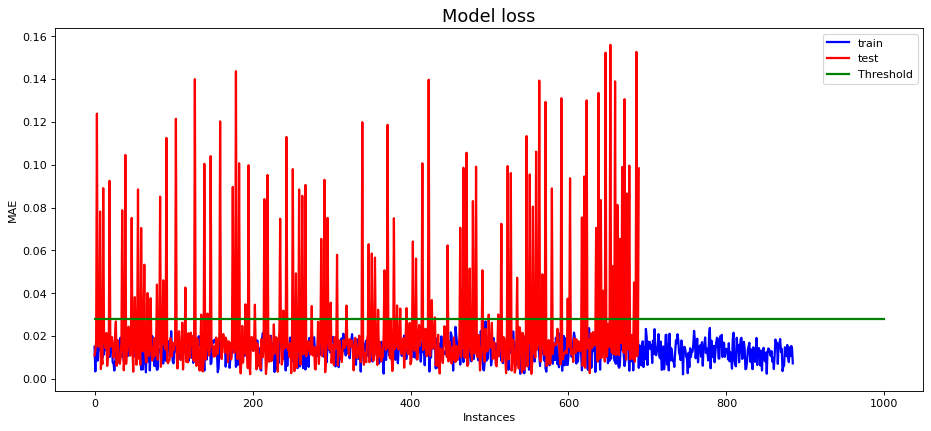

In [41]:
#plot error and detection threshold

from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(train_errors, 'b', label='train', linewidth=2)
ax.plot(test_errors, 'r', label='test', linewidth=2)
ax.plot(np.full(shape=1000, fill_value=threshold), 'g', label='Threshold', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('MAE')
ax.set_xlabel('Instances')
ax.legend(loc='upper right')
plt.show()